# Loading packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Loading input files into DataFrames

In [2]:
application_details = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

# Exploring application details dataset

In [3]:
application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
application_details.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

## Data cleanup

In [7]:
# Removing duplicates based on ID
application_details.drop_duplicates(subset=['ID'], inplace=True)

# Removing constant variable
application_details.drop(['FLAG_MOBIL'], axis=1, inplace=True)

# Filling missing occupation types with a new label
application_details['OCCUPATION_TYPE'].fillna(value='Not identified', inplace=True)

## Checking feature histograms

<AxesSubplot:>

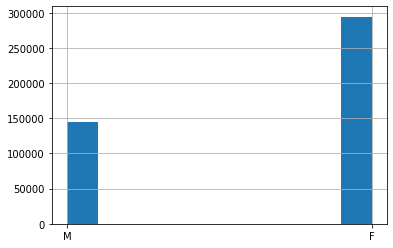

In [8]:
application_details['CODE_GENDER'].hist()

<AxesSubplot:>

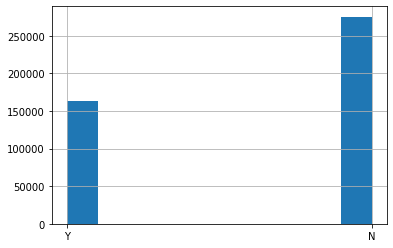

In [9]:
application_details['FLAG_OWN_CAR'].hist()

<AxesSubplot:>

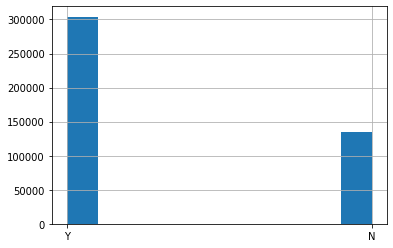

In [10]:
application_details['FLAG_OWN_REALTY'].hist()

<AxesSubplot:>

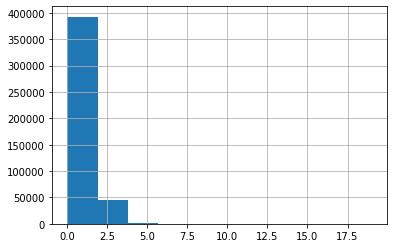

In [11]:
application_details['CNT_CHILDREN'].hist()

<AxesSubplot:>

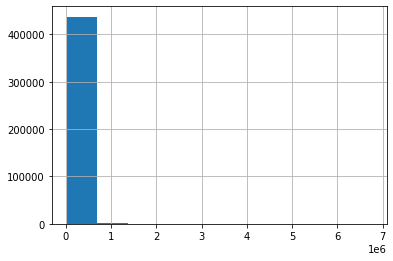

In [12]:
application_details['AMT_INCOME_TOTAL'].hist()

<AxesSubplot:>

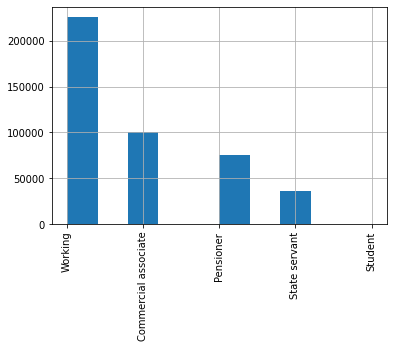

In [13]:
application_details['NAME_INCOME_TYPE'].hist(xrot=90)

<AxesSubplot:>

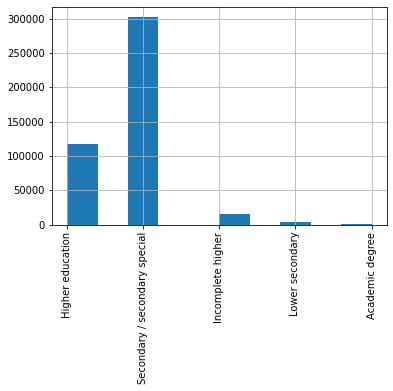

In [14]:
application_details['NAME_EDUCATION_TYPE'].hist(xrot=90)

<AxesSubplot:>

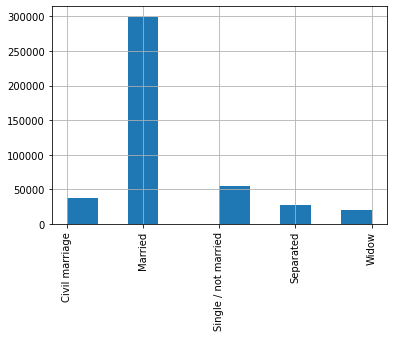

In [15]:
application_details['NAME_FAMILY_STATUS'].hist(xrot=90)

<AxesSubplot:>

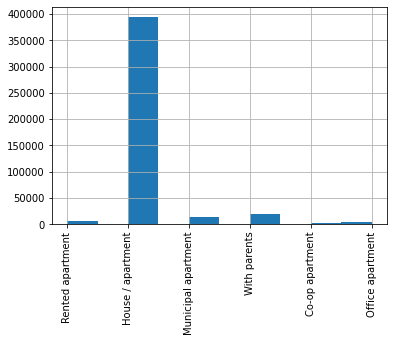

In [16]:
application_details['NAME_HOUSING_TYPE'].hist(xrot=90)

<AxesSubplot:>

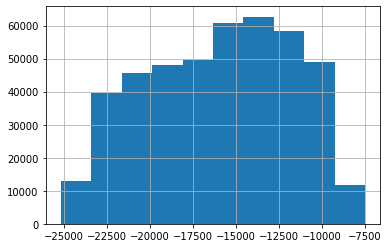

In [17]:
application_details['DAYS_BIRTH'].hist()

<AxesSubplot:>

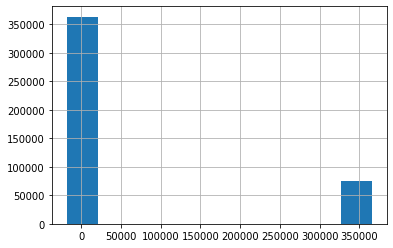

In [18]:
application_details['DAYS_EMPLOYED'].hist()

Days employed seem to be off, not according to the specification.

<AxesSubplot:>

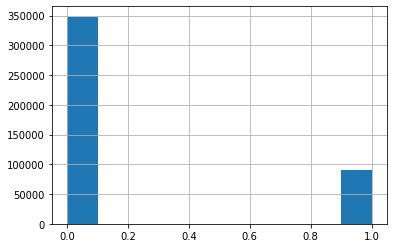

In [19]:
application_details['FLAG_WORK_PHONE'].hist()

<AxesSubplot:>

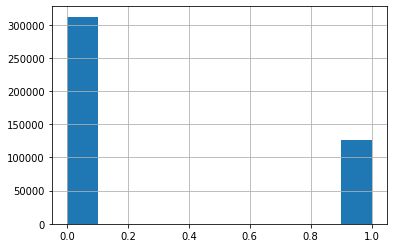

In [20]:
application_details['FLAG_PHONE'].hist()

<AxesSubplot:>

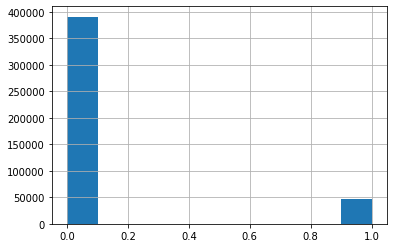

In [21]:
application_details['FLAG_EMAIL'].hist()

<AxesSubplot:>

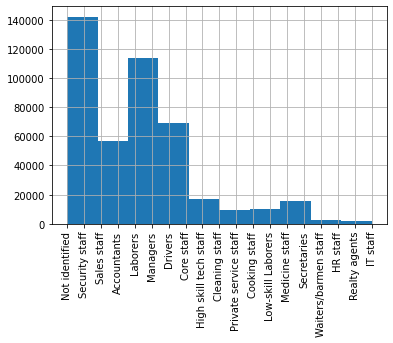

In [22]:
application_details['OCCUPATION_TYPE'].hist(xrot=90)

New 'Not identified' label is the most often result. Something must be done about it.

<AxesSubplot:>

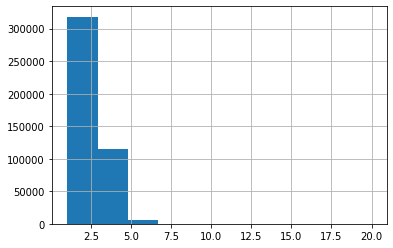

In [23]:
application_details['CNT_FAM_MEMBERS'].hist()

array([[<AxesSubplot:title={'center':'Accountants'}>,
        <AxesSubplot:title={'center':'Cleaning staff'}>,
        <AxesSubplot:title={'center':'Cooking staff'}>,
        <AxesSubplot:title={'center':'Core staff'}>],
       [<AxesSubplot:title={'center':'Drivers'}>,
        <AxesSubplot:title={'center':'HR staff'}>,
        <AxesSubplot:title={'center':'High skill tech staff'}>,
        <AxesSubplot:title={'center':'IT staff'}>],
       [<AxesSubplot:title={'center':'Laborers'}>,
        <AxesSubplot:title={'center':'Low-skill Laborers'}>,
        <AxesSubplot:title={'center':'Managers'}>,
        <AxesSubplot:title={'center':'Medicine staff'}>],
       [<AxesSubplot:title={'center':'Not identified'}>,
        <AxesSubplot:title={'center':'Private service staff'}>,
        <AxesSubplot:title={'center':'Realty agents'}>,
        <AxesSubplot:title={'center':'Sales staff'}>],
       [<AxesSubplot:title={'center':'Secretaries'}>,
        <AxesSubplot:title={'center':'Security staff'}>

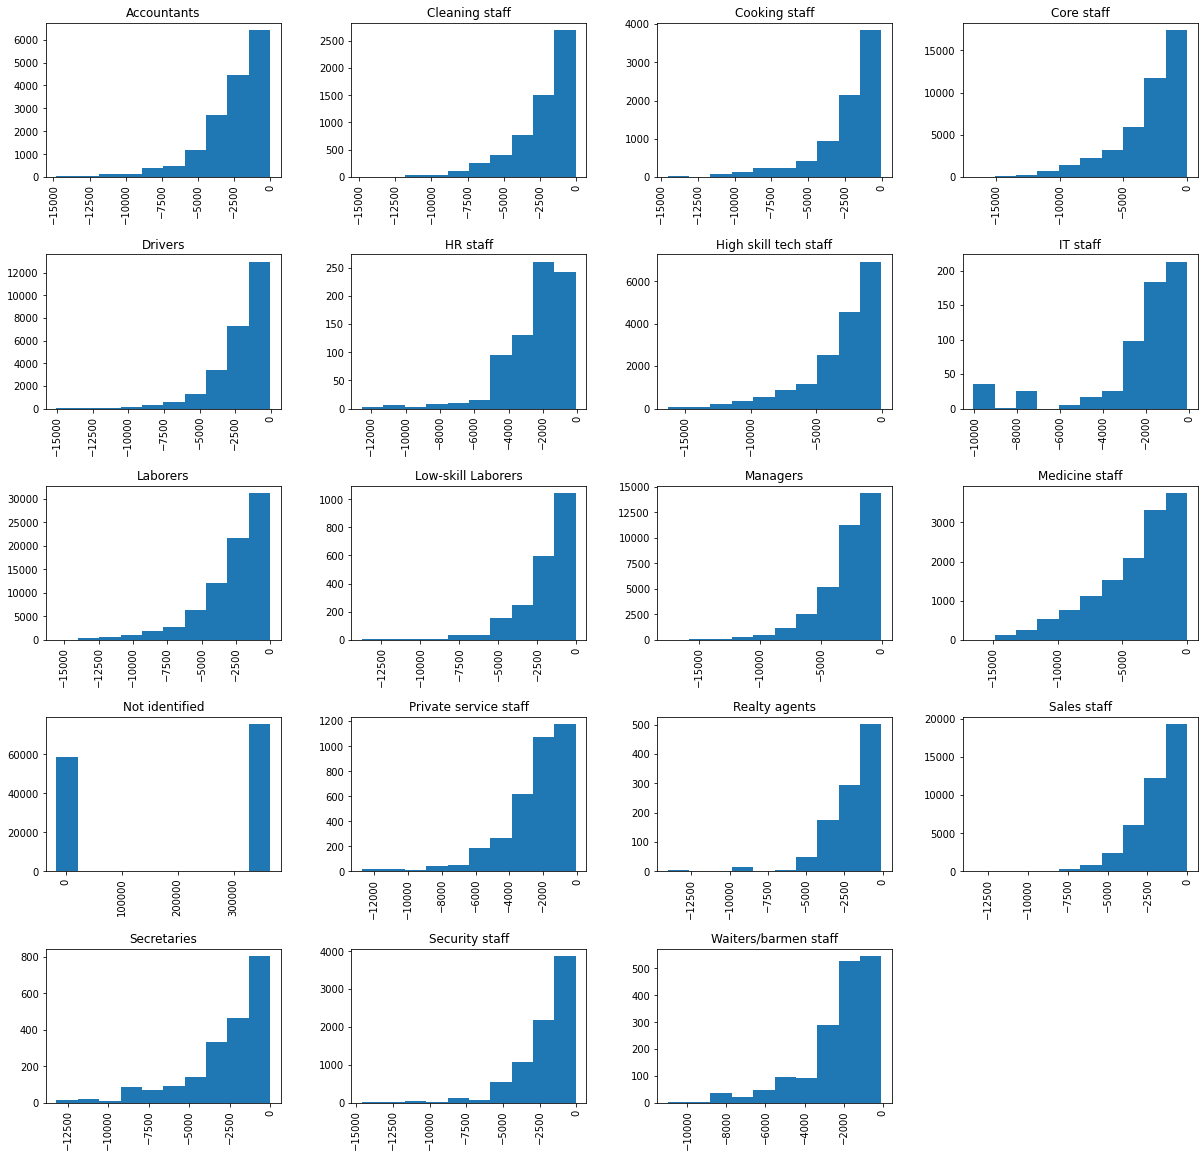

In [24]:
application_details[['DAYS_EMPLOYED','OCCUPATION_TYPE']].hist(by='OCCUPATION_TYPE', figsize=(20, 20))

It seems the issues with not identified occupation type and wrong numer of days employed are connected. I could simply remove the data, but let me give it one more shot.

array([[<AxesSubplot:title={'center':'Commercial associate'}>,
        <AxesSubplot:title={'center':'Pensioner'}>],
       [<AxesSubplot:title={'center':'State servant'}>,
        <AxesSubplot:title={'center':'Student'}>],
       [<AxesSubplot:title={'center':'Working'}>, <AxesSubplot:>]],
      dtype=object)

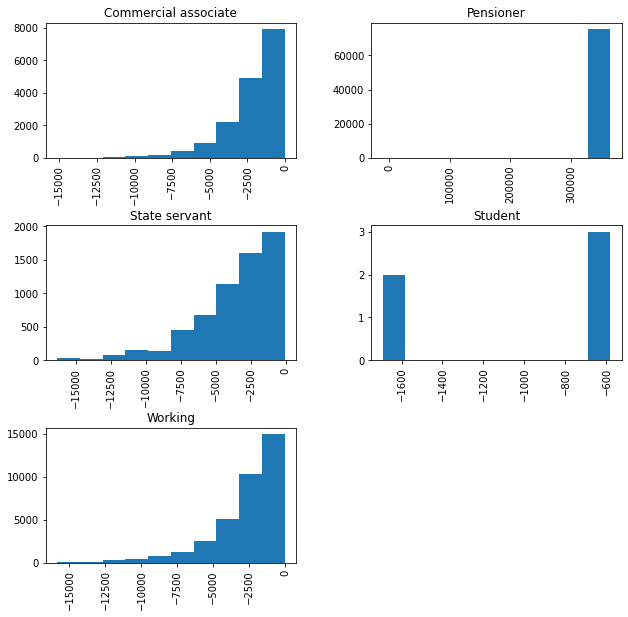

In [25]:
application_details.loc[application_details['OCCUPATION_TYPE'] == 'Not identified'][['DAYS_EMPLOYED','NAME_INCOME_TYPE']].hist(by='NAME_INCOME_TYPE', figsize=(10, 10))

It looks like the most of not identified occupation type have ther income type as pensioners. They are the ones with the wrong days employed values.

array([[<AxesSubplot:title={'center':'Accountants'}>,
        <AxesSubplot:title={'center':'Cooking staff'}>,
        <AxesSubplot:title={'center':'Core staff'}>,
        <AxesSubplot:title={'center':'Drivers'}>],
       [<AxesSubplot:title={'center':'High skill tech staff'}>,
        <AxesSubplot:title={'center':'Laborers'}>,
        <AxesSubplot:title={'center':'Low-skill Laborers'}>,
        <AxesSubplot:title={'center':'Managers'}>],
       [<AxesSubplot:title={'center':'Medicine staff'}>,
        <AxesSubplot:title={'center':'Not identified'}>,
        <AxesSubplot:title={'center':'Sales staff'}>,
        <AxesSubplot:title={'center':'Secretaries'}>],
       [<AxesSubplot:title={'center':'Security staff'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

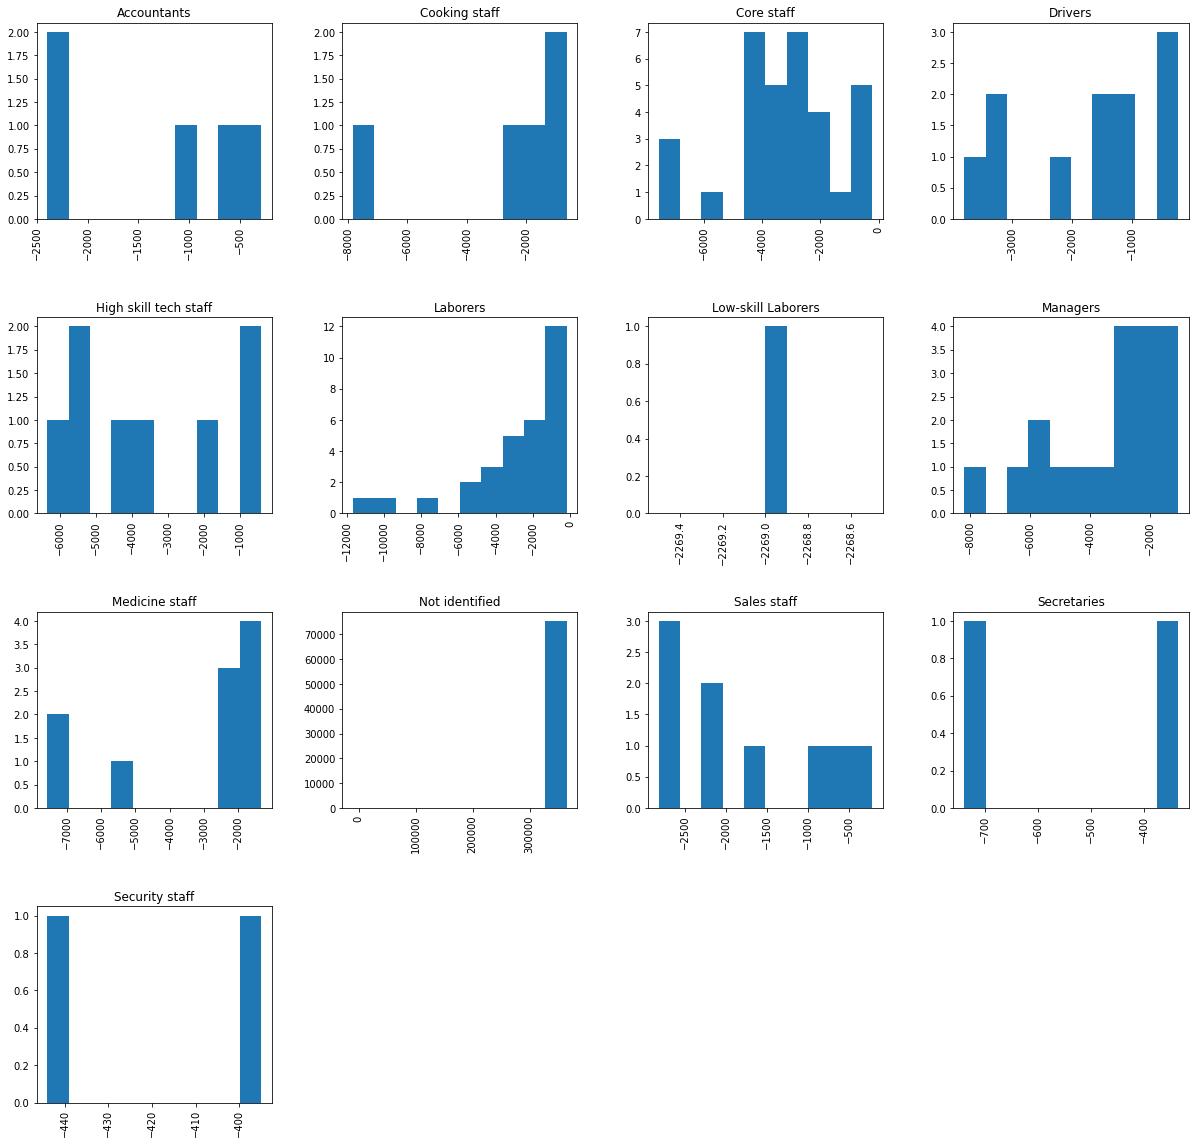

In [26]:
application_details.loc[application_details['NAME_INCOME_TYPE'] == 'Pensioner'][['DAYS_EMPLOYED','OCCUPATION_TYPE']].hist(by='OCCUPATION_TYPE', figsize=(20, 20))

Most pensioners have their occupation type not identified.

# Application details feature engineering

In [27]:
# Adjusting days employed, as the people who had the wrong value (pensioners), did not work at all
application_details.loc[(application_details['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

# Creating 'Pensioner' occupation type for all pensioners, substantially reducing 'Not identified' group
application_details.loc[(application_details['NAME_INCOME_TYPE'] == 'Pensioner') & (application_details['OCCUPATION_TYPE'] == 'Not identified'), 'OCCUPATION_TYPE'] = 'Pensioner'

# Cleaned application details dataset

In [28]:
application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Not identified,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Not identified,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,0,0,0,Pensioner,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,0,0,0,Pensioner,2.0


# Exploring credit record dataset

In [29]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [30]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [31]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## Checking feature histograms

<AxesSubplot:>

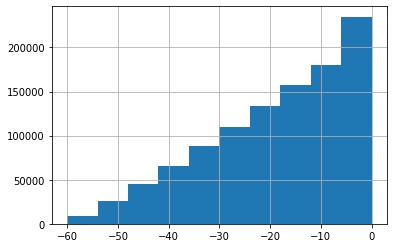

In [32]:
credit_record['MONTHS_BALANCE'].hist()

<AxesSubplot:>

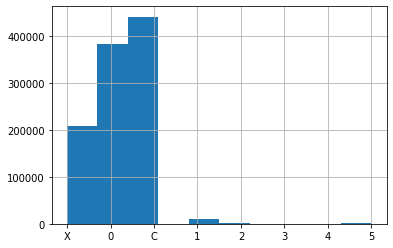

In [33]:
credit_record['STATUS'].hist()

In [34]:
credit_record[['ID', 'MONTHS_BALANCE']].drop_duplicates().shape[0]

1048575

# Credit record feature engineering

In [35]:
# Mapping of the statuses. 60 or more days overdue is considered as a bad debt.
status_dict = {'C' : 'Good_Debt',
               'X' : 'Good_Debt',
               '0' : 'Good_Debt',
               '1' : 'Good_Debt',
               '2' : 'Bad_Debt',
               '3' : 'Bad_Debt',
               '4' : 'Bad_Debt',
               '5' : 'Bad_Debt'}

credit_record.replace({'STATUS' : status_dict}, inplace=True)

# Mapped statused are grouped and counted by ID and STATUS values
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [36]:
credit_record

STATUS,Bad_Debt,Good_Debt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


## Defining dependent variable to be predicted

In [37]:
# If a number of 'Good_Debt' months in the books is higher than the number of 'Bad_Debt' months, the customer gets the credit approval
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] <= credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

## Defining extra feature

In [38]:
# Number of months in books can be a factor helping to determine the credit decision
credit_record['MONTHS_IN_BOOKS'] = credit_record['Good_Debt'] + credit_record['Bad_Debt']

## Data cleanup

In [39]:
credit_record.drop(['Bad_Debt', 'Good_Debt'], axis=1, inplace=True)

# Cleaned credit record dataset

In [40]:
credit_record

STATUS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
ID,,
5001711,1.0,4
5001712,1.0,19
5001713,1.0,22
5001714,1.0,15
5001715,1.0,60
...,...,...
5150482,1.0,18
5150483,1.0,18
5150484,1.0,13


In [41]:
credit_record['CREDIT_APPROVAL_STATUS'].value_counts()

1.0    45931
0.0       54
Name: CREDIT_APPROVAL_STATUS, dtype: int64

The dataset is highly imbalanced. This needs to be taken into account during the model training.

# Joining the datasets

In [42]:
merged_dataset = application_details.reset_index().merge(credit_record, on='ID').set_index('index')

In [43]:
merged_dataset

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
index,,,,,,,,,,,,,,,,,,,
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Not identified,2.0,1.0,16
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Not identified,2.0,1.0,15
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,1.0,30
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1.0,5
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,1.0,12
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1.0,24
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1.0,33


In [44]:
# Dropping the obsolete ID column
merged_dataset.drop(['ID'], axis=1, inplace=True)

# One-hot encoding of the nominal data

In [45]:
one_hot = pd.get_dummies(application_details[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']], prefix=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first=True)

In [46]:
one_hot

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not identified,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
438553,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438554,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
438555,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
# Removing original columns
merged_dataset.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis=1, inplace=True)

In [48]:
# Joining the DataFrames
merged_dataset = merged_dataset.join(one_hot)

# Normalization of numerical data

In [49]:
merged_dataset[['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','MONTHS_IN_BOOKS']] = pd.DataFrame(StandardScaler().fit_transform(merged_dataset[['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','MONTHS_IN_BOOKS']]), index=merged_dataset.index, columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','MONTHS_IN_BOOKS'])

# Final dataset

In [50]:
merged_dataset

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not identified,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
index,,,,,,,,,,,,,,,,,,,,,
0,-0.579661,2.365845,0.945169,-0.989403,1,0,0,-0.217680,1.0,-0.357599,...,0,0,1,0,0,0,0,0,0,0
1,-0.579661,2.365845,0.945169,-0.989403,1,0,0,-0.217680,1.0,-0.424661,...,0,0,1,0,0,0,0,0,0,0
2,-0.579661,-0.728827,-1.309091,0.450538,0,0,0,-0.217680,1.0,0.581264,...,0,0,0,0,0,0,0,0,1,0
3,-0.579661,0.818509,-0.746300,-0.359429,0,1,1,-1.314564,1.0,-1.095278,...,0,0,0,0,0,0,1,0,0,0
4,-0.579661,0.818509,-0.746300,-0.359429,0,1,1,-1.314564,1.0,-1.095278,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,-0.579661,1.260605,-0.326825,-0.092820,0,0,0,-0.217680,1.0,-0.625846,...,1,0,0,0,0,0,0,0,0,0
434809,-0.579661,-0.286731,0.854227,0.369837,0,1,1,-0.217680,1.0,0.178894,...,0,1,0,0,0,0,0,0,0,0
434810,-0.579661,-0.286731,0.854227,0.369837,0,1,1,-0.217680,1.0,0.782449,...,0,1,0,0,0,0,0,0,0,0


# Dividing the dataset into independent and dependent variables

In [51]:
X = merged_dataset.loc[:, merged_dataset.columns != 'CREDIT_APPROVAL_STATUS']
y = merged_dataset['CREDIT_APPROVAL_STATUS']

In [52]:
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_IN_BOOKS,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not identified,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
index,,,,,,,,,,,,,,,,,,,,,
0,-0.579661,2.365845,0.945169,-0.989403,1,0,0,-0.217680,-0.357599,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.579661,2.365845,0.945169,-0.989403,1,0,0,-0.217680,-0.424661,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.579661,-0.728827,-1.309091,0.450538,0,0,0,-0.217680,0.581264,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.579661,0.818509,-0.746300,-0.359429,0,1,1,-1.314564,-1.095278,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.579661,0.818509,-0.746300,-0.359429,0,1,1,-1.314564,-1.095278,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,-0.579661,1.260605,-0.326825,-0.092820,0,0,0,-0.217680,-0.625846,1,...,1,0,0,0,0,0,0,0,0,0
434809,-0.579661,-0.286731,0.854227,0.369837,0,1,1,-0.217680,0.178894,0,...,0,1,0,0,0,0,0,0,0,0
434810,-0.579661,-0.286731,0.854227,0.369837,0,1,1,-0.217680,0.782449,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
y

index
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
434808    1.0
434809    1.0
434810    1.0
434811    1.0
434812    1.0
Name: CREDIT_APPROVAL_STATUS, Length: 36457, dtype: float64

# Splitting train and test samples

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_IN_BOOKS,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not identified,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
index,,,,,,,,,,,,,,,,,,,,,
37076,-0.579661,-0.728827,1.309412,0.172521,1,1,0,-0.217680,-0.156414,0,...,0,0,0,0,0,0,0,0,0,0
1507,0.767400,-0.286731,0.510696,-0.861380,0,0,0,0.879204,-1.296463,0,...,0,0,0,0,0,0,0,0,0,0
39666,-0.579661,0.597461,-0.835337,-1.942603,0,0,0,-0.217680,1.184820,1,...,1,0,0,0,0,0,0,0,0,0
48220,-0.579661,-1.170923,-0.922708,-3.642392,0,0,0,-1.314564,0.178894,1,...,0,0,1,0,0,0,0,0,0,0
23549,-0.579661,2.586893,-0.991985,-0.377174,0,1,1,-1.314564,0.044771,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,-0.579661,-0.949875,0.335716,0.700668,0,0,0,-0.217680,-0.894093,1,...,0,0,0,0,0,0,0,0,0,0
45607,-0.579661,-0.949875,0.097649,-0.762088,1,1,0,-0.217680,-0.558784,1,...,0,0,1,0,0,0,0,0,0,0
6776,0.767400,-0.507779,1.085390,-0.334500,0,0,0,-0.217680,-0.759969,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y_train

index
37076    1.0
1507     1.0
39666    1.0
48220    1.0
23549    1.0
        ... 
11613    1.0
45607    1.0
6776     1.0
17475    1.0
46125    1.0
Name: CREDIT_APPROVAL_STATUS, Length: 25519, dtype: float64

In [57]:
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_IN_BOOKS,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not identified,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
index,,,,,,,,,,,,,,,,,,,,,
22261,0.767400,-0.065683,-0.376819,0.168296,0,0,0,0.879204,-0.894093,0,...,0,0,0,0,0,0,0,0,0,0
49441,2.114462,-0.728827,0.917553,-0.641248,0,0,0,0.879204,-0.558784,0,...,0,0,0,0,0,0,0,0,0,0
47425,-0.579661,0.597461,-1.739041,0.929673,0,0,0,-1.314564,-0.894093,0,...,0,0,0,1,0,0,0,0,0,0
38089,-0.579661,2.586893,-0.424195,-1.223055,0,1,0,-0.217680,0.648326,0,...,1,0,0,0,0,0,0,0,0,0
20962,0.767400,-0.065683,1.318696,0.498705,0,0,0,0.879204,-0.894093,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24891,-0.579661,-1.259342,-2.023055,0.929673,0,1,0,-0.217680,1.788375,0,...,0,0,0,1,0,0,0,0,0,0
25769,0.767400,-0.507779,0.991592,0.655882,1,1,0,-0.217680,-0.827031,0,...,0,0,0,0,0,0,1,0,0,0
23087,0.767400,-0.065683,0.726147,0.214351,0,0,1,0.879204,-0.424661,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_test

index
22261    1.0
49441    1.0
47425    1.0
38089    1.0
20962    1.0
        ... 
24891    1.0
25769    1.0
23087    1.0
13794    1.0
18058    1.0
Name: CREDIT_APPROVAL_STATUS, Length: 10938, dtype: float64

# Base Linear SVC model training

In [59]:
estimator = LinearSVC()
estimator.fit(X_train, y_train.values.ravel())
score = estimator.score(X_test, y_test)
print(score)

0.9982629365514719


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


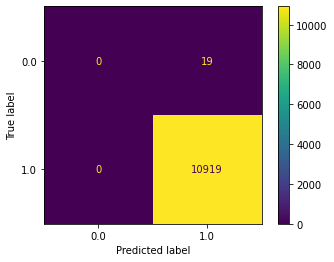

In [60]:
ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)

Although the accuracy is high, the model has a poor performance.

# Balanced SVC model training

In [61]:
estimator = SVC(class_weight='balanced')
estimator.fit(X_train, y_train.values.ravel())
score = estimator.score(X_test, y_test)
print(score)

0.9874748582921924


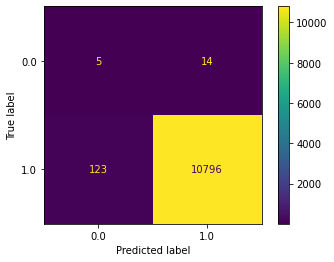

In [62]:
ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)

The model managed to identify 5 out 19 customers that should not be approved at the cost of 123 that got rejected but should be approved.

# Hyperparameter tunning

In [70]:
def svc_hyperparameter_tuning(X, Y):
    num_features = X.shape[1]    
    param_grid = {'C': [1.0, 4.0, 16.0, 64.0, 256.0], 
                  'gamma': [1/(num_features), 1/(num_features/2), 1/(num_features/4), 1/(num_features/8), 1/(num_features/16)],
                  'kernel': ['rbf'],
                  'class_weight': ['balanced'],
                  'max_iter': [4000],
                  'random_state': [1]
                 } 

    grid = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', verbose=1, n_jobs = -1)
    grid.fit(X, Y)
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_

    print('Wynik', grid.best_estimator_, num_features, 'features:')
    print(grid.best_score_)

    param_grid = {'C': np.linspace(best_params['C']/2, best_params['C']*2, num=4), 
                  'gamma': np.linspace(best_params['gamma']/2, best_params['gamma']*2, num=4),
                  'kernel': ['rbf'],
                  'class_weight': ['balanced'],
                  'max_iter': [4000],
                  'random_state': [1]
                 } 

    grid = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', verbose=1, n_jobs = -1)
    grid.fit(X, Y)

    print('Wynik', grid.best_estimator_, num_features, 'features:')
    print(grid.best_score_)

    param_grid = {'C': np.linspace(grid.best_params_['C'], best_params['C'], num=3), 
                  'gamma': np.linspace(grid.best_params_['gamma'], best_params['gamma'], num=3),
                  'kernel': ['rbf'],
                  'class_weight': ['balanced'],
                  'max_iter': [4000],
                  'random_state': [1]
                 }

    grid = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', verbose=1, n_jobs = -1)
    grid.fit(X, Y)

    best_score = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_

    print('Wynik', grid.best_estimator_, num_features, 'features:')
    print(grid.best_score_)

    return best_estimator, best_params, best_score

In [72]:
best_estimator, best_params, best_score = svc_hyperparameter_tuning(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wynik SVC(C=256.0, class_weight='balanced', gamma=0.3333333333333333, max_iter=4000,
    random_state=1) 48 features:
0.9970188588113974
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Wynik SVC(C=512.0, class_weight='balanced', gamma=0.6666666666666666, max_iter=4000,
    random_state=1) 48 features:
0.9973434920177258
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wynik SVC(C=512.0, class_weight='balanced', gamma=0.6666666666666666, max_iter=4000,
    random_state=1) 48 features:
0.9973434920177258


In [73]:
print(best_score)

0.9973434920177258


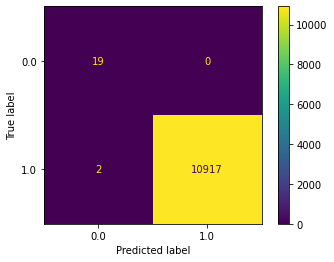

In [74]:
ConfusionMatrixDisplay.from_estimator(best_estimator, X_test, y_test)